In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import  silhouette_score
from sklearn import preprocessing as preproc
from sklearn.cluster import KMeans
import random
import string
import math
import time
import timeit

In [6]:
#KMeans - DOGS
data_dogs = pd.read_csv("./dogs.csv")
data_dogs = data_dogs.drop(columns='breed')

est_dogs = KMeans(n_clusters = 3, init='random')

In [7]:
%%time
#merenje uz pomoc time.procces_time
#ne racuna vreme za koje je proces spavao
t_start = time.process_time()
est_dogs.fit(data_dogs)
t_end = time.process_time()
print(t_end - t_start)
#alternativno:
#timeit.timeit(lambda: est_dogs.fit(data_dogs), number=1)

0.046875
Wall time: 33 ms


In [8]:
print("Oznake klastera za svaku instancu: ", est_dogs.labels_)
print("Broj iteracija algoritma: ", est_dogs.n_iter_)
print("Suma kvadrata rastojanja do njblizeg centroida: ", est_dogs.inertia_)

Oznake klastera za svaku instancu:  [2 0 0 1 0 2 2 1 2 2 0]
Broj iteracija algoritma:  4
Suma kvadrata rastojanja do njblizeg centroida:  2175.5


In [9]:
siluette_dogs = silhouette_score(data_dogs, est_dogs.labels_)
print("Silueta: ", siluette_dogs)

Silueta:  0.5423733549698899


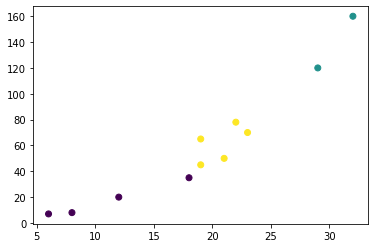

In [10]:
figure = plt.figure()
figure.add_subplot(1,1,1)
plt.scatter(data_dogs['height'].tolist(), data_dogs['weight'].tolist(), c = est_dogs.labels_)

In [11]:
#KMeans - IRIS
data_iris = pd.read_csv("./iris.csv")
data_iris = data_iris.drop(columns='Species')

scaler = preproc.MinMaxScaler().fit(data_iris)
data_iris = pd.DataFrame(scaler.transform(data_iris))
data_iris.rename( 
    columns = { data_iris.columns[0]: "Sepal_Length", data_iris.columns[1]: "Sepal_Width", 
               data_iris.columns[2]: "Petal_Length", data_iris.columns[3]: "Petal_Width"},
               inplace=True )

est_iris = KMeans(n_clusters = 3, init='random')

In [12]:
%%time
t_start = time.process_time()
est_iris.fit(data_iris)
t_end = time.process_time()
print(t_end - t_start)

0.03125
Wall time: 35 ms


In [13]:
print("Oznake klastera za svaku instancu: ", est_iris.labels_)
print("Broj iteracija algoritma: ", est_iris.n_iter_)
print("Suma kvadrata rastojanja do njblizeg centroida: ", est_iris.inertia_)

Oznake klastera za svaku instancu:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 2 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
Broj iteracija algoritma:  6
Suma kvadrata rastojanja do njblizeg centroida:  6.982216473785234


In [14]:
siluette_iris = silhouette_score(data_iris, est_iris.labels_)
print("Silueta: ", siluette_iris)

Silueta:  0.5047687565398589


In [15]:
def distance(i1 ,i2):
    #Euclid                
    squared_coord_diff_sum = 0    
    for field in i1._fields:        
        if field == "Index" or field == "Clusters":
            continue            
        else:
            squared_coord_diff = (getattr(i1, field) - getattr(i2, field))**2
            squared_coord_diff_sum = squared_coord_diff_sum + squared_coord_diff    
    distance = math.sqrt(squared_coord_diff_sum)                        
    return distance


def calculateSum(data, cluster_num):
    sum = 0    
    for cl in range(0,cluster_num):

        cluster_data = data.loc[data["Cluster"] == cl]        
        cluster_sum = 0

        #distanca medju instancama u jednom klasteru
        #iteriramo kroz parove redova u klasteru sa poretkom da ne bismo ponavljali parove
        for namedTuple1 in cluster_data.itertuples():
            for namedTuple2 in cluster_data.itertuples():
                if namedTuple1[0] < namedTuple2[0]:
                    cluster_sum = cluster_sum + distance(namedTuple1, namedTuple2)

        sum = sum + cluster_sum    
    
    return sum

In [23]:
data_iris["Cluster"] = np.array(est_iris.labels_)
sum = calculateSum(data_iris, 3)
print("Minimalna suma: ", sum)
data_iris = data_iris.drop(columns='Cluster')

Minimalna suma:  1054.100432007302


In [24]:
#samnjimo dimnziju da mozemo da iscrtamo na grafiku
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_iris)
data_lower_dimmension = pd.DataFrame(data = principalComponents, columns = ['col1', 'col2'])

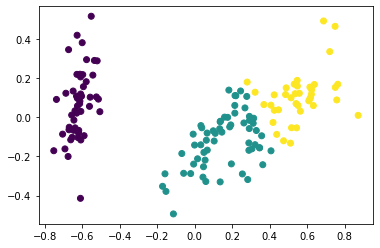

In [25]:
figure = plt.figure()
figure.add_subplot(1,1,1)
plt.scatter(data_lower_dimmension['col1'].tolist(), data_lower_dimmension['col2'].tolist(), c = est_iris.labels_)